# **UJIAN TENGAH SEMESTER K-NN**

Nama  : Kharisma Intan Safitri  
NIM   : 200411100010  
Kelas : Penambangan Data A  
Tanggal : 17 Oktober 2022

## **Topik Data:**  
Prediksi pengidap penyakit kanker payudara.


## **Definisi K-NN**   
KNN (K-Nearest Neighbor) adalah algoritma klasifikasi terawasi sederhana yang dapat kita gunakan untuk menetapkan kelas ke titik data baru. Hal ini dapat digunakan untuk regresi juga, KNN tidak membuat asumsi pada distribusi data, sehingga non-parametrik. Itu menyimpan semua data pelatihan untuk membuat prediksi masa depan dengan menghitung kesamaan antara sampel input dan setiap instance pelatihan.

kali ini membangun model KNN yang mengklasifikasikan spesies baru berdasarkan ukuran sepal dan petal. Dataset Iris tersedia di scikit-learn dan kita dapat menggunakannya untuk membangun KNN kita.

## **Langkah-Langkah Pengerjaan**

**Langkah1: Impor data yang diperlukan dan periksa fitur-fiturnya.**

Untuk langkah pertama kita bisa mengunduh dataset terlebih dahulu di UCI dengan mengakses link dataset yang telah diberikan. Kemudian, import fungsi-fungsi lain yang dibutuhkan untuk melakukan perhitungan.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from scipy import interp
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.patches as patches
sns.set()

In [19]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

**Langkah2: Pisahkan data dan Latih Modelnya.**

Pelatihan dan pengujian pada data yang sama bukanlah pendekatan yang optimal, jadi kami membagi data menjadi dua bagian, set pelatihan dan set pengujian. Kami menggunakan fungsi 'train_test_split' untuk membagi data. Parameter opsional 'test-size' menentukan persentase pemisahan. Parameter 'random_state' membuat data dibagi dengan cara yang sama setiap kali Anda menjalankan. Karena kami melatih dan menguji pada kumpulan data yang berbeda, akurasi pengujian yang dihasilkan akan menjadi perkiraan yang lebih baik tentang seberapa baik kemungkinan model untuk tampil pada data yang tidak terlihat.

In [20]:
data.shape

(116, 10)

In [21]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [22]:
data['Y']=LabelEncoder().fit_transform(data['Classification'])
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Y
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0


In [23]:
y = data['Y']
X = data.drop(['Age','Leptin','Adiponectin','MCP.1','Classification','Y'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)


Metode 'fit' digunakan untuk melatih model pada data training (X_train,y_train) dan metode 'predict' untuk melakukan pengujian pada data testing (X_test). Memilih nilai K yang optimal sangat penting, jadi kami menyesuaikan dan menguji model untuk nilai yang berbeda untuk K (dari 1 hingga 25) menggunakan for loop dan mencatat akurasi pengujian KNN dalam variabel (skor).

In [25]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [26]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.6202898550724637, 0.6293478260869565, 0.6724637681159421, 0.6989130434782609, 0.7246376811594202, 0.6811594202898551, 0.7242753623188405, 0.7068840579710144, 0.7503623188405797, 0.7420289855072464, 0.7413043478260869, 0.7670289855072464, 0.7413043478260869, 0.7583333333333334, 0.7670289855072465, 0.7413043478260869, 0.7496376811594203, 0.7318840579710144, 0.7402173913043478, 0.7235507246376811, 0.7409420289855072, 0.7239130434782608, 0.7409420289855072, 0.7235507246376811, 0.7409420289855072, 0.714855072463768, 0.7322463768115941, 0.714855072463768, 0.714855072463768, 0.6891304347826086]


Text(0, 0.5, 'Cross-validated accuracy')

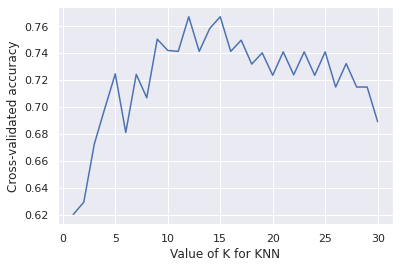

In [27]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

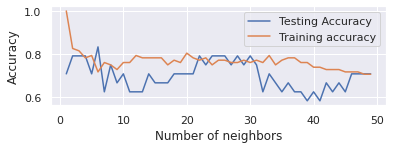

In [28]:
plt.title('k-NN Varying number of neighbors')
plt.subplot(2,1,2)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [29]:
y = np.squeeze(np.asarray(y))
X = np.squeeze(np.asarray(X))

In [30]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [31]:
#Testing accuracy for each value of K
scores

{1: 0.7083333333333334,
 2: 0.7916666666666666,
 3: 0.7916666666666666,
 4: 0.7916666666666666,
 5: 0.7083333333333334,
 6: 0.8333333333333334,
 7: 0.625,
 8: 0.75,
 9: 0.6666666666666666,
 10: 0.7083333333333334,
 11: 0.625,
 12: 0.625,
 13: 0.625,
 14: 0.7083333333333334,
 15: 0.6666666666666666,
 16: 0.6666666666666666,
 17: 0.6666666666666666,
 18: 0.7083333333333334,
 19: 0.7083333333333334,
 20: 0.7083333333333334,
 21: 0.7083333333333334,
 22: 0.7916666666666666,
 23: 0.75,
 24: 0.7916666666666666,
 25: 0.7916666666666666}

Secara umum akurasi Training meningkat seiring dengan meningkatnya kompleksitas model, untuk KNN kompleksitas model ditentukan oleh nilai K. Nilai K yang lebih besar menyebabkan batas keputusan yang lebih halus (model yang kurang kompleks). K yang lebih kecil mengarah ke model yang lebih kompleks (dapat menyebabkan overfitting). Pengujian akurasi menghukum model yang terlalu kompleks (over fitting) atau tidak cukup kompleks (underfit). Kami mendapatkan akurasi pengujian maksimum ketika model memiliki tingkat kompleksitas yang tepat, dalam kasus kami, kami dapat melihat bahwa untuk nilai nilai keakurasian dalam pemodelan ini tidak stbail dan akurasi terting mencapai 80% keatas.



Text(0, 0.5, 'Testing Accuracy')

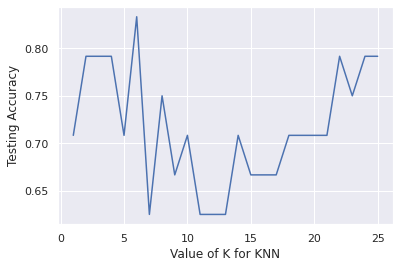

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Untuk model akhir, dapat memilih nilai optimal K sebagai 5 (yang berada di antara 3 dan 19) dan melatih kembali model dengan semua data yang tersedia. Dan itu akan menjadi model terakhir yang siap untuk membuat prediksi.

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [34]:
classes = {0:'sehat', 1:'Kanker'}


x_new = [[3,4,5,2,6],
         [5,4,2,2,5]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


sehat
sehat
